# Pair Programming EDA III

Objetivos

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis.

In [3]:
import pandas as pd
import sidetable
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('../datos/datos_limpiezaII.csv', index_col= 0)
pd.options.display.max_columns=None

In [5]:
plt.rcParams['figure.figsize'] = (12,12)

1. ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

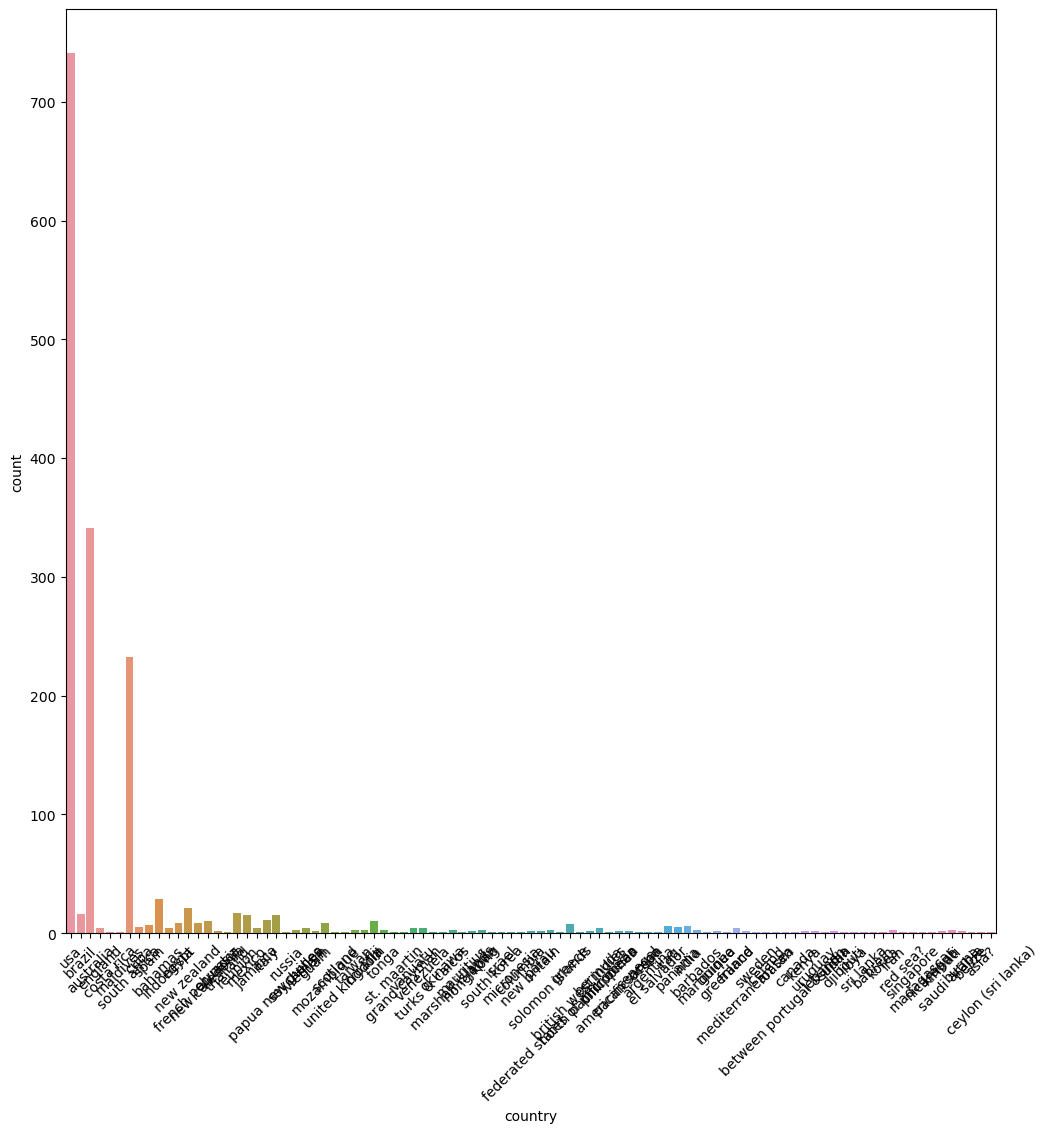

In [6]:
fig = sns.countplot(x= 'country', data = df)
plt.xticks(rotation = 45)

plt.show();

Esta grafica no se puede leer, tiene muchos paises y es muy confuso, entonces nos quedamos con los 10 primeros.

In [7]:
paises = df.stb.freq(['country'])[:10]

In [8]:
paises

,country,count,percent,cumulative_count,cumulative_percent
0,usa,741,44.746377,741,44.746377
1,australia,341,20.591787,1082,65.338164
2,south africa,233,14.070048,1315,79.408213
3,bahamas,29,1.751208,1344,81.159420
4,new zealand,21,1.268116,1365,82.427536
5,reunion,17,1.026570,1382,83.454106
6,brazil,16,0.966184,1398,84.420290
7,papua new guinea,15,0.905797,1413,85.326087
8,mexico,15,0.905797,1428,86.231884
9,italy,11,0.664251,1439,86.896135


In [9]:
paises['country'].unique()

array(['usa', 'australia', 'south africa', 'bahamas', 'new zealand',
       'reunion', 'brazil', 'papua new guinea', 'mexico', 'italy'],
      dtype=object)

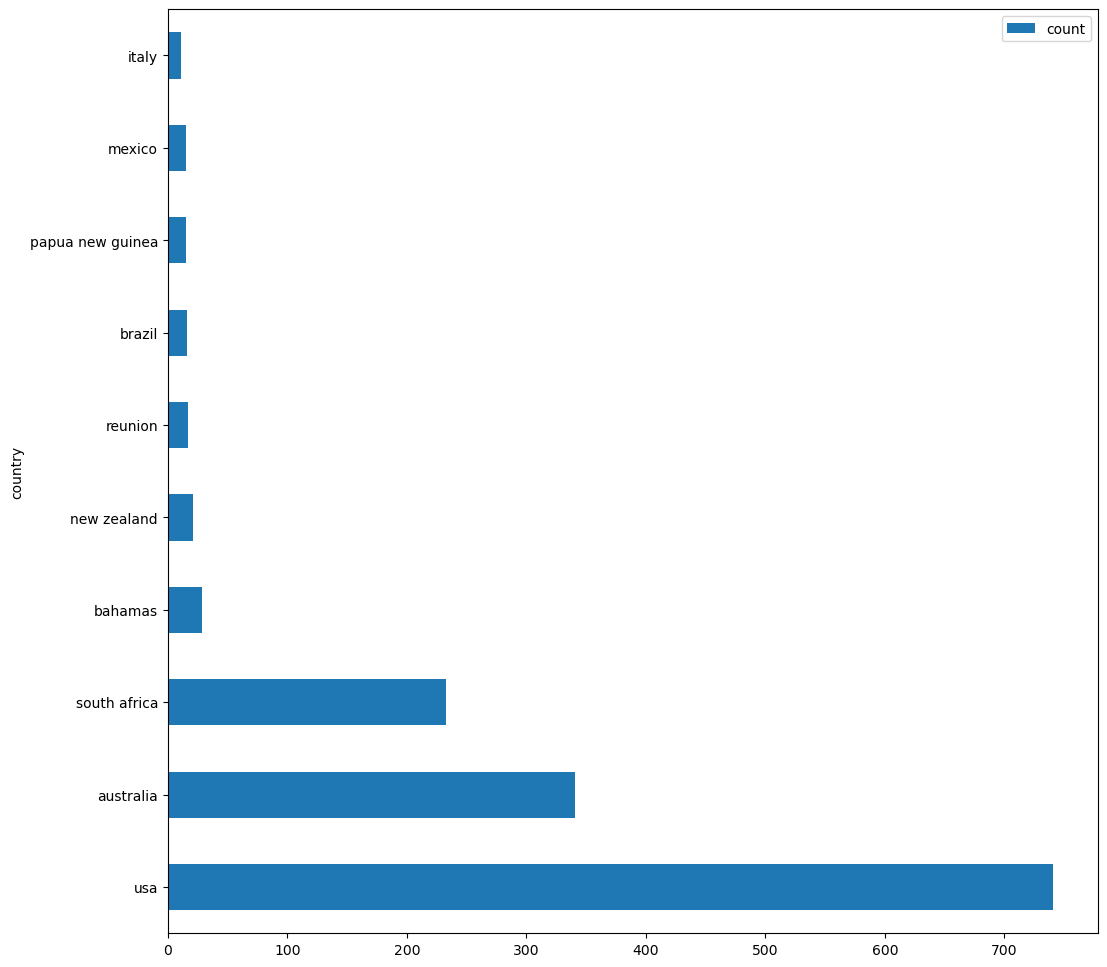

In [33]:
paises.plot.barh(x='country', y = 'count');


2. Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [11]:
paises1 = paises['country'].unique()
paises1

array(['usa', 'australia', 'south africa', 'bahamas', 'new zealand',
       'reunion', 'brazil', 'papua new guinea', 'mexico', 'italy'],
      dtype=object)

In [12]:
df10 = df[df['country'].isin(paises1)]
#para encontrar los 10 paises en la tabla principal

In [13]:
order_countries = list(df10["country"].value_counts().index)

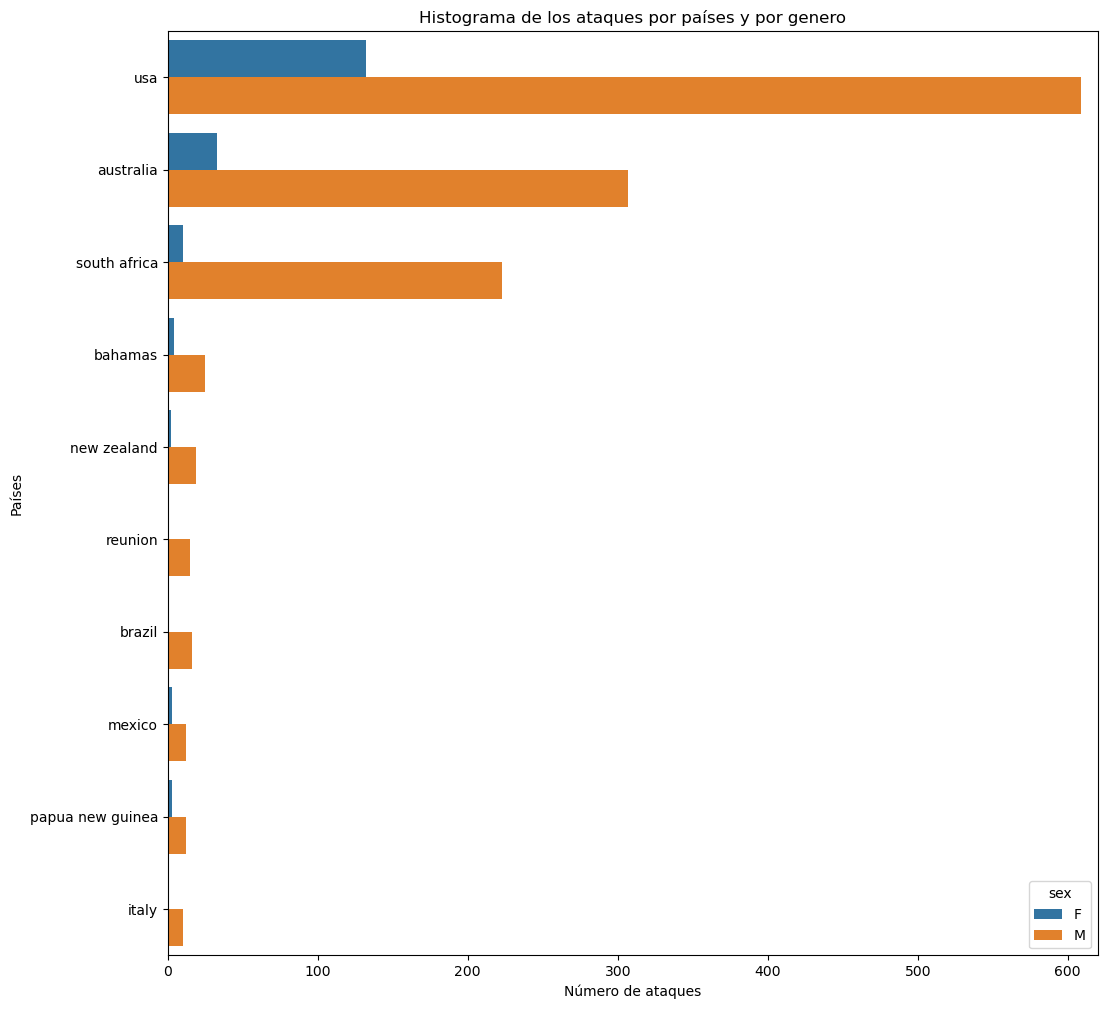

In [14]:
# seleccionamos el countplot 

fig = sns.countplot(y='country', data = df10, hue = 'sex', order = order_countries)

# cambiamos el nombre de los ejes
fig.set(xlabel='Número de ataques', ylabel = 'Países')

# ponemos título a la gráfica
fig.set_title('Histograma de los ataques por países y por genero')

# mostramos la gráfica
plt.xlim(0,620)
plt.show()


Al final decidimos mostrar los resultados con un *countplot* porque nos permite de ordenar los resultados por numero de ataques por paises.

Como podemos ver los hombres son victimas de ataques de tiburones mas que las mujeres, con mucha diferencia.
Este patrón se repite en casi todos los paises menos que en Reunion, Brazil, Italy donde hay muy pocos ataques.

Creemos que afecta los roles de genero, los hombres tienen mas situaciones de riesgo que las mujeres.

3. ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [15]:
df10["age_numbers"] = df10['age_numbers'].astype("Int64", errors = "raise")

In [16]:
df10['age_bins'] = pd.cut(df10["age_numbers"], 6)

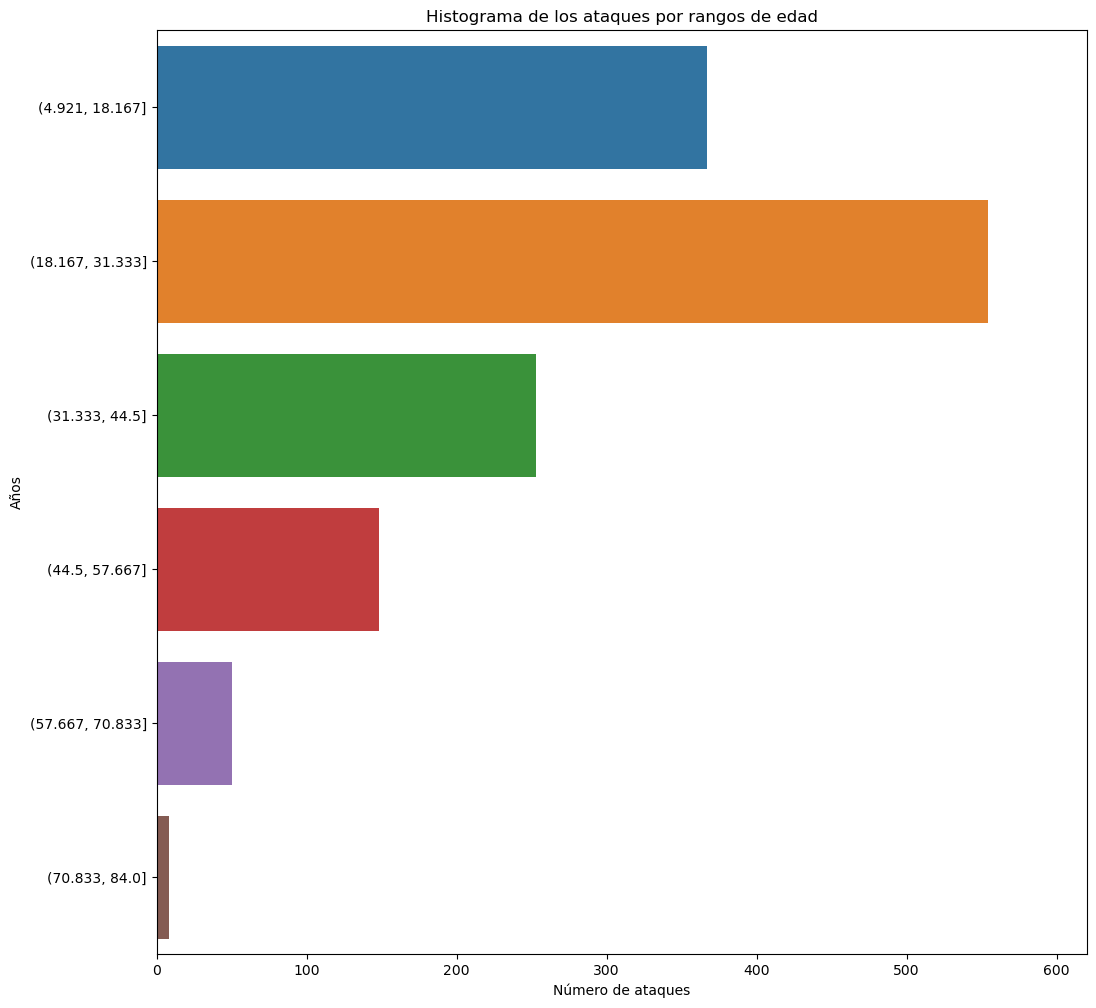

In [17]:
# seleccionamos el countplot 

fig = sns.countplot(y='age_bins', data = df10)

# cambiamos el nombre de los ejes
fig.set(xlabel='Número de ataques', ylabel = 'Años')

# ponemos título a la gráfica
fig.set_title('Histograma de los ataques por rangos de edad')

# mostramos la gráfica
plt.xlim(0,620)
plt.show()


la mayoria de los ataques le sucede aquellos entre los 18 y los 33 años.

4. Ataques entre sexos, ¿hay diferencia?

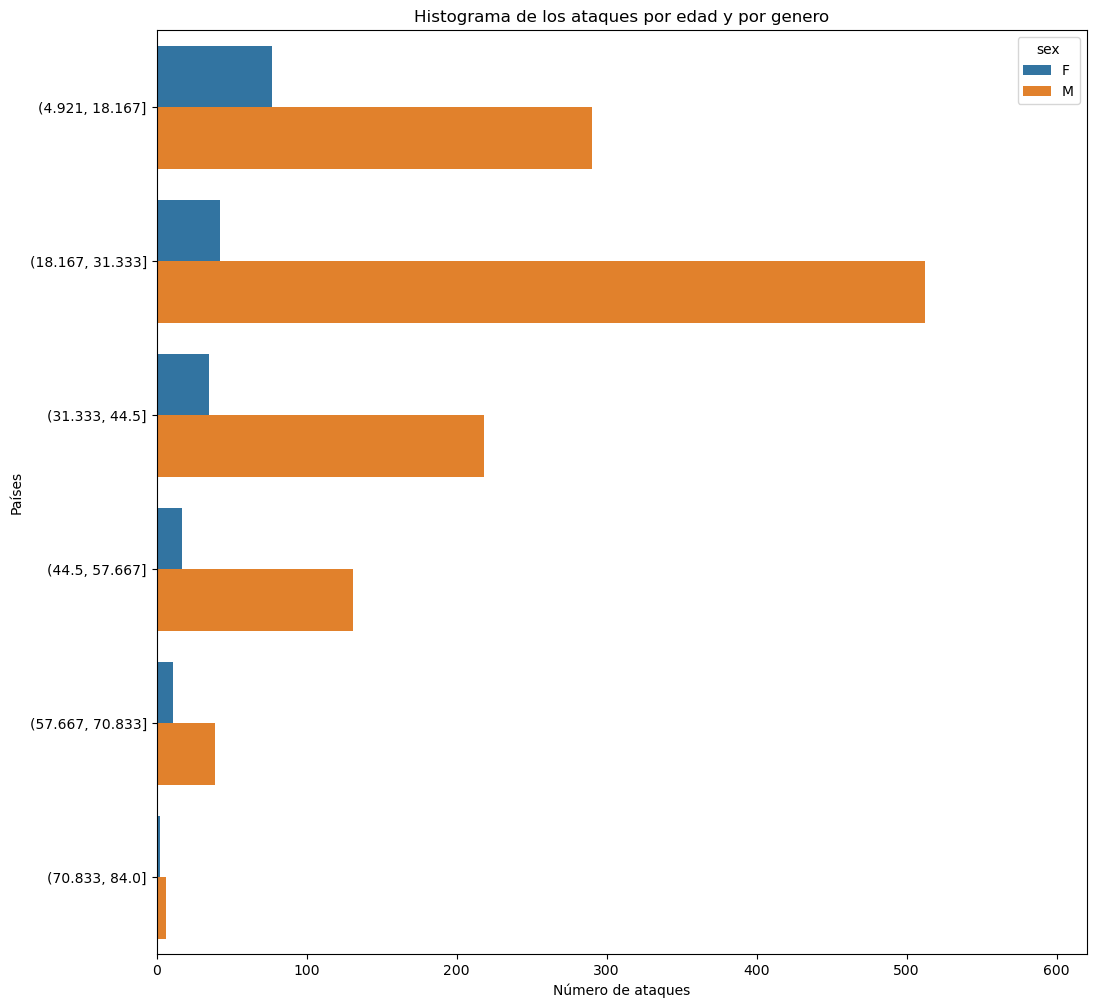

In [18]:
# seleccionamos el countplot 

fig = sns.countplot(y='age_bins', data = df10, hue = 'sex')

# cambiamos el nombre de los ejes
fig.set(xlabel='Número de ataques', ylabel = 'Países')

# ponemos título a la gráfica
fig.set_title('Histograma de los ataques por edad y por genero')

# mostramos la gráfica
plt.xlim(0,620)
plt.show()


5. ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

In [31]:
df_agrupado = df.groupby('year').count().reset_index() #Agrupamos por año
df_agrupado = df_agrupado[df_agrupado['year'] > 1980] #Para que la gráfica sea más legible, mostramos a partir de 1980

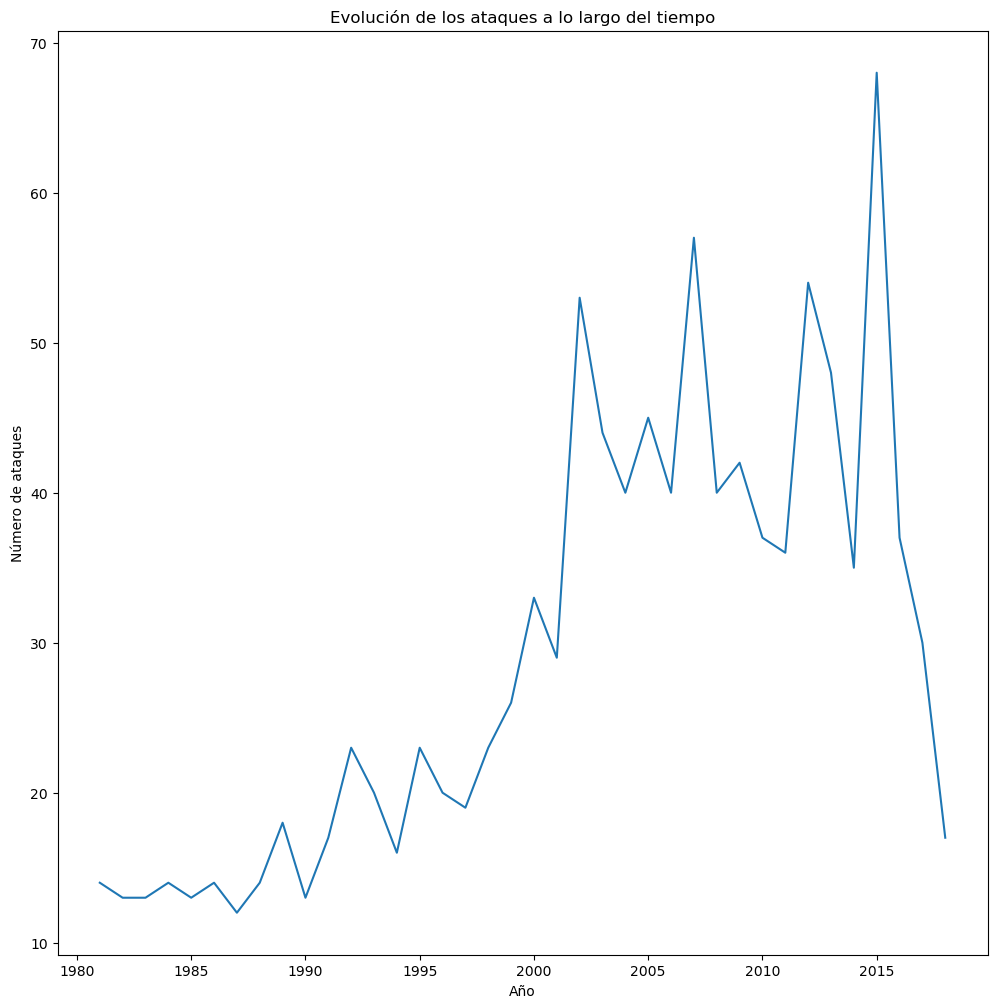

In [34]:
fig = sns.lineplot(x='year', y= 'country', data = df_agrupado)

# cambiamos el nombre de los ejes
fig.set(xlabel='Año', ylabel = 'Número de ataques')

# ponemos título a la gráfica
fig.set_title('Evolución de los ataques a lo largo del tiempo')

plt.show()

Ocurren más ataques en 2015, se produce un pico debido al fenómeno meterológico 'El Niño', que sube la temperatura del mar y permite que se expanda el territorio de este animal acuático.